In [49]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [50]:
# This command tells python to remember a main folder path_Original Data
path_1= r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi/02. Data/Original Data'

In [51]:
# This command tells python to remember a main folder path_Prepared Data
path = r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi/02. Data/Prepared Data'

In [52]:
# Importing the new data file into the Jupyter 
cust_ord_prod = pd.read_pickle(os.path.join(path, 'orders_products_customer_merged.pkl'))

In [53]:
cust_ord_prod.shape

(32404859, 32)

In [54]:
cust_ord_prod.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## 2. Consider any security implications that might exist for this new data.

#### For the purpose of this work, first name and last name will be dropped due to PII

In [55]:
# dropping the first name 
cust_ord_prod.drop(['first_name',], axis=1, inplace = True)

In [56]:
# Check column names
cust_ord_prod.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_behaviour_orders', 'order_frequency', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')

## 3. Create a “Region” column based on the “State” column from your customers data set.

In [57]:
#Creating region lists
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [58]:
#Creating regional flag column
cust_ord_prod.loc[cust_ord_prod['state'].isin(Northeast),'region']='Northeast'
cust_ord_prod.loc[cust_ord_prod['state'].isin(Midwest),'region']='Midwest'
cust_ord_prod.loc[cust_ord_prod['state'].isin(South),'region']='South'
cust_ord_prod.loc[cust_ord_prod['state'].isin(West),'region']='West'

In [59]:
# Check the length of the new column
len(cust_ord_prod['region'])

32404859

In [60]:
# Check the frequency
cust_ord_prod['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3b. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [61]:
# Create a crosstab between a 'region' and 'spending_flag'
crosstab= pd.crosstab(cust_ord_prod['region'], cust_ord_prod['spending_flag'], dropna = False)

In [62]:
crosstab.to_clipboard()

## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [63]:
# create exclusive flag column
cust_ord_prod.loc[cust_ord_prod['max_order']<5, 'activity'] = 'low'
cust_ord_prod.loc[cust_ord_prod['max_order']>=5, 'activity'] = 'high'

In [64]:
# Create df ot customers with less than 5 orders
cust_ord_prod_low = cust_ord_prod[cust_ord_prod['activity'] == 'low']

In [65]:
# Check dataframe
cust_ord_prod_low.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Male,Kansas,41,1/7/2018,2,married,122060,both,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Male,Kansas,41,1/7/2018,2,married,122060,both,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Male,Kansas,41,1/7/2018,2,married,122060,both,Midwest,low


In [66]:
cust_ord_prod_low['activity'].value_counts(dropna = False)

activity
low    1440295
Name: count, dtype: int64

In [67]:
# Export cust_ord_prod_low
cust_ord_prod_low.to_pickle(os.path.join(path, 'low_activity_customers.pkl'))

## 5-7. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents, Create an appropriate visualization to show the distribution of profiles, and Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


#### Age Profile

In [68]:
# Create age profile variables
cust_ord_prod.loc[cust_ord_prod['age']<=25, 'age_group']='Young Adult'
cust_ord_prod.loc[(cust_ord_prod['age']<65)&(cust_ord_prod['age']>25), 'age_group']='Adult'
cust_ord_prod.loc[cust_ord_prod['age']>=65, 'age_group']='Senior'

In [69]:
# Check new variable
cust_ord_prod['age_group'].value_counts()

age_group
Adult          19784586
Senior          8575084
Young Adult     4045189
Name: count, dtype: int64

In [70]:
# Aggregate for age group usage frequency
cust_ord_prod.groupby('age_group').agg({'median_days_behaviour_orders':['mean', 'min', 'max']})

median_days_behaviour_orders           
                                    mean  min   max
age_group                                          
Adult                          10.416147  0.0  30.0
Senior                         10.362496  0.0  30.0
Young Adult                    10.382574  0.0  30.0

In [71]:
# Aggregate for age group expenditure
cust_ord_prod.groupby('age_group').agg({'prices':['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        12.031993  1.0  99999.0
Senior       11.768850  1.0  99999.0
Young Adult  12.175118  1.0  99999.0

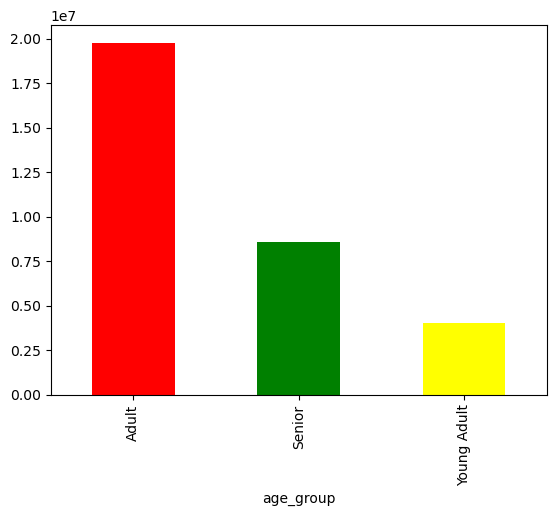

In [72]:
# Age profile visual
bar=cust_ord_prod['age_group'].value_counts().plot.bar(color = ['red', 'green', 'yellow'])

In [73]:
# This command defines the path where python saves the visualizations
path = r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi'

In [74]:
# Exporting the bar chart in the path
bar.figure.savefig(os.path.join(path, 'Visualizations', 'bar_agegroup.png'))

#### Income Profile

In [75]:
#Create inceome profiling variable

cust_ord_prod.loc[cust_ord_prod['income']<40000, 'income_group']='low income'
cust_ord_prod.loc[(cust_ord_prod['income']>=40000)&(cust_ord_prod['income']<150000), 'income_group']='middle income'
cust_ord_prod.loc[cust_ord_prod['income']>150000, 'income_group']='high income'

In [76]:
# Check the new variable
cust_ord_prod['income_group'].value_counts()

income_group
middle income    26626080
high income       4050840
low income        1727198
Name: count, dtype: int64

In [77]:
# Aggregate for income group order frequency

cust_ord_prod.groupby('income_group').agg({'median_days_behaviour_orders': ['mean', 'min', 'max']})

median_days_behaviour_orders           
                                      mean  min   max
income_group                                         
high income                      10.175597  0.0  30.0
low income                       11.254839  0.0  30.0
middle income                    10.375971  0.0  30.0

In [78]:
# Aggregate for income group expenditure

cust_ord_prod.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
high income    32.894506  1.0  99999.0
low income      6.495264  1.0     25.0
middle income   9.154296  1.0  99999.0

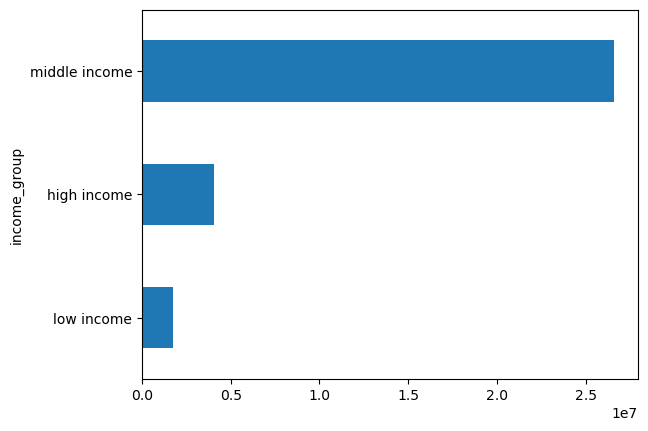

In [79]:
#Income profile visualization

bar1=cust_ord_prod['income_group'].value_counts().sort_values().plot.barh()

In [80]:
# Exporting the bar1 chart in the path
bar1.figure.savefig(os.path.join(path, 'Visualizations', 'bar_incomegroup.png'))

In [81]:
# Creating dependent group profiling variable
cust_ord_prod.loc[cust_ord_prod['n_dependants']>0, 'dependent_group']='has dependents' 
cust_ord_prod.loc[cust_ord_prod['n_dependants']==0, 'dependent_group']='no dependents'

In [82]:
# Checking new variable
cust_ord_prod['dependent_group'].value_counts()

dependent_group
has dependents    24307356
no dependents      8097503
Name: count, dtype: int64

In [83]:
# Aggregate for dependent group order frequency
cust_ord_prod.groupby('dependent_group').agg({'median_days_behaviour_orders': ['mean', 'min', 'max']})

median_days_behaviour_orders           
                                        mean  min   max
dependent_group                                        
has dependents                     10.407817  0.0  30.0
no dependents                      10.367567  0.0  30.0

In [84]:
# Aggregate for dependent group expenditure
cust_ord_prod.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_group                         
has dependents   11.930584  1.0  99999.0
no dependents    12.129243  1.0  99999.0

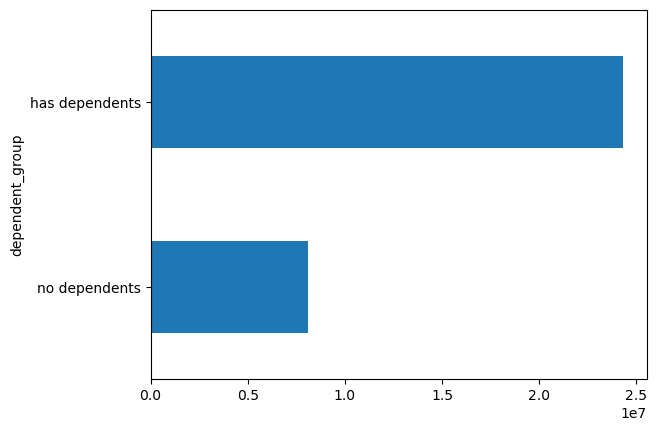

In [85]:
# Number of dependent group profile visual
bar2 = cust_ord_prod['dependent_group'].value_counts().sort_values().plot.barh()

In [86]:
# Exporting the bar2 chart in the path
bar2.figure.savefig(os.path.join(path, 'Visualizations', 'bar_dependantgroup.png'))

#### Department ID Profile

In [89]:
# This command tells python to remember a main folder path_Original Data
path= r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi/02. Data/Prepared Data'

In [90]:
# Importing the departments file into the Jupyter 
cust_ord_prod_dept = pd.read_csv(os.path.join(path, 'departments_wrangled.csv'))

In [91]:
# Checking df
cust_ord_prod_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [92]:
#Rename unnamed column to department_id
cust_ord_prod_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [136]:
cust_ord_prod_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [94]:
#Turning department dataframe into data dictionary
zipped=zip(cust_ord_prod_dept['department_id'], cust_ord_prod_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [95]:
# Connect department names to department_id in dataframe
cust_ord_prod['department'] = cust_ord_prod['department_id'].map(data_dict)

In [96]:
#Checking dataframe
cust_ord_prod.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,marital_status,income,_merge,region,activity,age_group,income_group,dependent_group,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,Midwest,high,Senior,middle income,has dependents,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,Midwest,high,Senior,middle income,has dependents,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,Northeast,high,Senior,high income,has dependents,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,3,married,31308,both,Midwest,low,Adult,low income,has dependents,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,3,married,31308,both,Midwest,low,Adult,low income,has dependents,snacks


#### Department - Baby Profile

In [97]:
# Creating baby department profiling variable
cust_ord_prod['baby_status'] = [1 if x == 'babies' else 0 for x in cust_ord_prod['department']]
cust_ord_prod['baby_status'] = cust_ord_prod.groupby(['user_id'])['baby_status'].transform(np.max)

/var/folders/ld/rygzx5nj4x3ddd2l1z5rj3m80000gn/T/ipykernel_93007/50616247.py:3: FutureWarning: The provided callable <function max at 0x11011b9c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cust_ord_prod['baby_status'] = cust_ord_prod.groupby(['user_id'])['baby_status'].transform(np.max)


In [98]:
#Checking new variable
cust_ord_prod['baby_status'].value_counts(dropna=False)

baby_status
0    22431550
1     9973309
Name: count, dtype: int64

In [99]:
# Aggregate for baby status bracket order frequency
cust_ord_prod.groupby('baby_status').agg({'median_days_behaviour_orders': ['mean', 'min', 'max']})

median_days_behaviour_orders           
                                    mean  min   max
baby_status                                        
0                              11.253698  0.0  30.0
1                               8.472618  0.0  30.0

In [100]:
# Aggregate for baby status bracket expenditure
cust_ord_prod.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.515291  1.0  99999.0
1            10.776779  1.0  99999.0

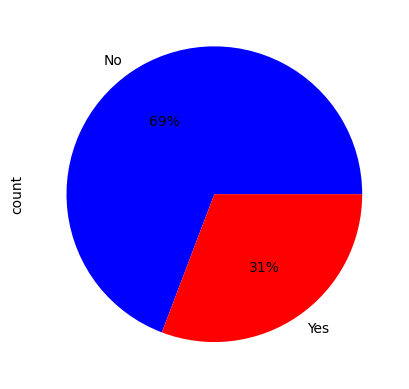

In [102]:
# Baby Status Visual
pie = cust_ord_prod['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','red'])

In [105]:
# This command defines the path where python saves the visualizations
path = r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi'

In [106]:
# Exporting the pie chart in the path
pie.figure.savefig(os.path.join(path, 'Visualizations', 'pie_babystatus.png'))

#### Department - Alcohol Profile

In [108]:
#Creating alcohol profiling variable
cust_ord_prod['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in cust_ord_prod['department']]
cust_ord_prod['alcohol_status'] = cust_ord_prod.groupby(['user_id'])['alcohol_status'].transform(np.max)

/var/folders/ld/rygzx5nj4x3ddd2l1z5rj3m80000gn/T/ipykernel_93007/2893568953.py:3: FutureWarning: The provided callable <function max at 0x11011b9c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cust_ord_prod['alcohol_status'] = cust_ord_prod.groupby(['user_id'])['alcohol_status'].transform(np.max)


In [109]:
#Checking new variable
cust_ord_prod['alcohol_status'].value_counts(dropna=False)

alcohol_status
0    29991046
1     2413813
Name: count, dtype: int64

In [111]:
# Aggregate for alcohol_status bracket order frequency
cust_ord_prod.groupby('alcohol_status').agg({'median_days_behaviour_orders': ['mean', 'min', 'max']})

median_days_behaviour_orders           
                                       mean  min   max
alcohol_status                                        
0                                  10.42511  0.0  30.0
1                                  10.05793  0.0  30.0

In [112]:
# Aggregate for alcohol_status bracket expenditure
cust_ord_prod.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               11.058561  1.0  99999.0
1               23.431691  1.0  99999.0

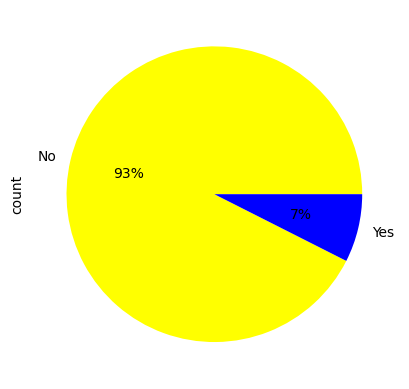

In [113]:
# Alcohol_status visual
pie1 = cust_ord_prod['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','blue'])

In [114]:
# Exporting the pie1 chart in the path
pie1.figure.savefig(os.path.join(path, 'Visualizations', 'pie_alcoholstatus.png'))

#### Department - Pet Profile

In [115]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)
cust_ord_prod['pet_status'] = [1 if x == 'pets' else 0 for x in cust_ord_prod['department']]
cust_ord_prod['pet_status']=cust_ord_prod.groupby(['user_id'])['pet_status'].transform(np.max)

/var/folders/ld/rygzx5nj4x3ddd2l1z5rj3m80000gn/T/ipykernel_93007/1217068654.py:5: FutureWarning: The provided callable <function max at 0x11011b9c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cust_ord_prod['pet_status']=cust_ord_prod.groupby(['user_id'])['pet_status'].transform(np.max)


In [116]:
# Checking new variable
cust_ord_prod['pet_status'].value_counts(dropna=False)

pet_status
0    28876718
1     3528141
Name: count, dtype: int64

In [117]:
#Aggregating for pet_status bracket order frequency
cust_ord_prod.groupby('pet_status').agg({'median_days_behaviour_orders': ['mean', 'min', 'max']})

median_days_behaviour_orders           
                                   mean  min   max
pet_status                                        
0                             10.517953  0.0  30.0
1                              9.414006  0.0  30.0

In [118]:
#Aggregating for pet_status bracket expenditure
cust_ord_prod.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.680857  1.0  99999.0
1           14.430461  1.0  99999.0

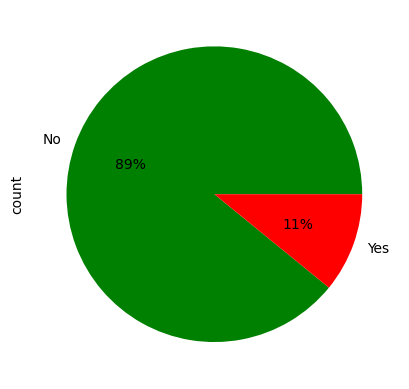

In [120]:
# Pet_status Visual
pie2 = cust_ord_prod['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

In [121]:
# Exporting the pie2 chart in the path
pie2.figure.savefig(os.path.join(path, 'Visualizations', 'pie_petstatus.png'))

## 8-9. Compare your customer profiles with regions and departments and Produce suitable charts to illustrate your results and export them in your project folder.

In [122]:
# Creating crosstab for region and age group
age_region = pd.crosstab(cust_ord_prod['region'], cust_ord_prod['age_group'], dropna = False)

In [123]:
# Checking crosstab
age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,4666947,1990844,939534
Northeast,3457721,1553903,711112
South,6578963,2836257,1376665
West,5080955,2194080,1017878


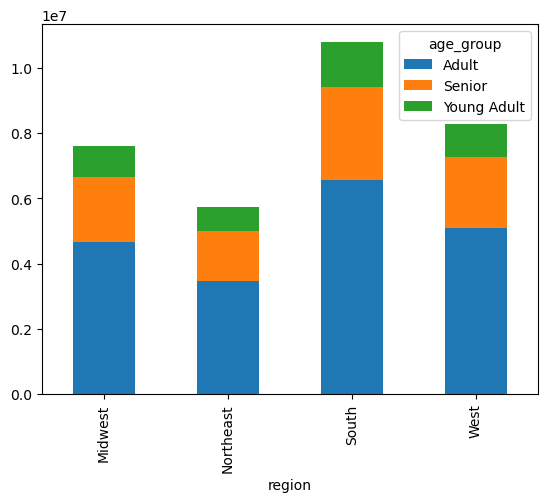

In [124]:
# Age_region Bar Chart
bar3 = age_region.plot(kind='bar', stacked =True)

In [125]:
# Exporting the bar3 chart in the path
bar3.figure.savefig(os.path.join(path, 'Visualizations', 'bar_age_region.png'))

In [126]:
# Creating crosstab for region and income
region_income = pd.crosstab(cust_ord_prod['region'], cust_ord_prod['income_group'], dropna = False)

In [127]:
# Checking crosstab
region_income

income_group,high income,low income,middle income,NaN
region,,,,
Midwest,955414,401040,6240337,534
Northeast,706738,303379,4712569,50
South,1342055,590337,8859336,157
West,1046633,432442,6813838,0


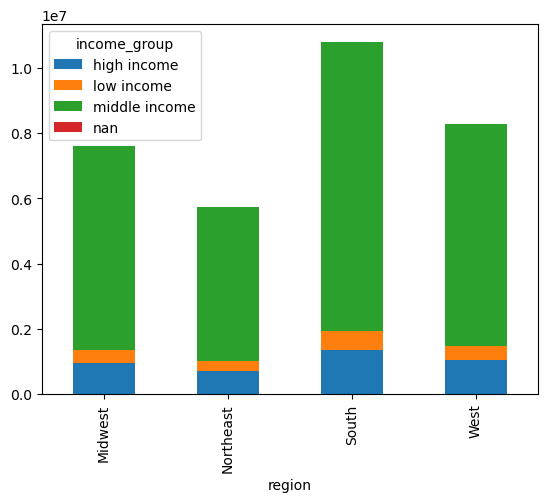

In [128]:
# Region_income bar chart
bar4 = region_income.plot(kind='bar', stacked =True)

In [129]:
# Exporting the bar4 chart in the path
bar4.figure.savefig(os.path.join(path, 'Visualizations', 'bar_region_income.png'))

In [130]:
# Creating crosstab for region and department
region_dep = pd.crosstab(cust_ord_prod['department'], cust_ord_prod['region'], dropna = False)

In [131]:
# Checking Crossbar
region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


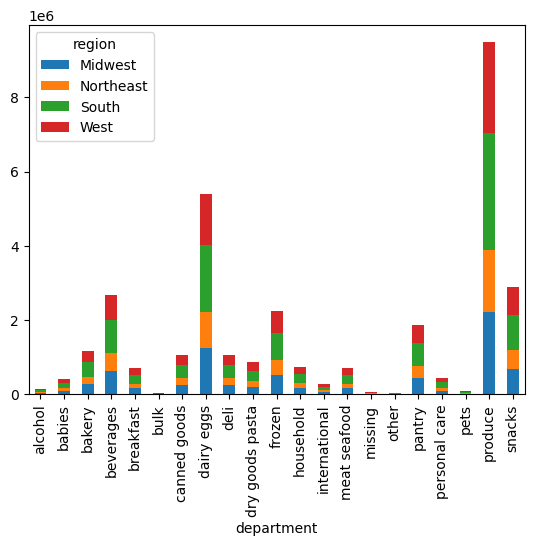

In [132]:
# Region_department Bar5 Chart
bar5 = region_dep.plot(kind='bar', stacked =True)

In [133]:
# Exporting the bar5 chart in the path
bar5.figure.savefig(os.path.join(path, 'Visualizations', 'bar_region_department.png'))

In [138]:
# Creating crosstab for income and frequency
income_freq = pd.crosstab(cust_ord_prod['income_group'], cust_ord_prod['order_frequency'], dropna = False)

In [139]:
# Checking crosstab
income_freq

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
income_group,,,,
high income,2738005,424272,888563,0
low income,1069109,242934,415155,0
middle income,17752205,2969181,5904689,5
NaN,534,50,157,0


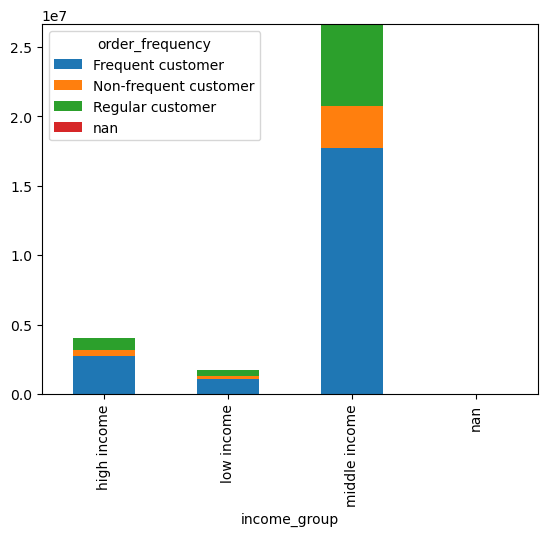

In [140]:
# Income Group and Order frequency Bar6Chart
bar6 = income_freq.plot(kind='bar', stacked =True)

In [141]:
# Exporting the bar6 chart in the path
bar6.figure.savefig(os.path.join(path, 'Visualizations', 'bar_income_frequency.png'))

In [142]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(cust_ord_prod['age_group'], cust_ord_prod['order_frequency'], dropna = False)

In [143]:
# Checking crosstab
age_freq

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
age_group,,,,
Adult,13133299,2232850,4418432,5
Senior,5728812,951609,1894663,0
Young Adult,2697742,451978,895469,0


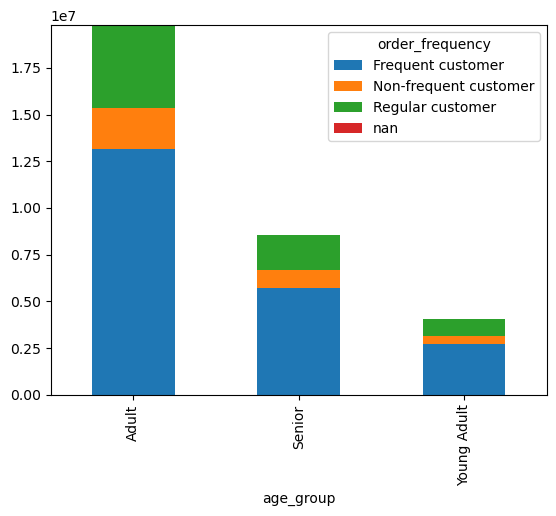

In [144]:
# Region Price Range Bar7 Chart
bar7 = age_freq.plot(kind='bar', stacked =True)

In [145]:
# Exporting the bar7 chart in the path
bar7.figure.savefig(os.path.join(path, 'Visualizations', 'bar_age_freq.png'))

In [152]:
# Creating crosstab for marital status and frequency
marital_freq = pd.crosstab(cust_ord_prod['marital_status'], cust_ord_prod['order_frequency'], dropna = False)

In [153]:
# Checking crosstab
marital_freq

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
marital_status,,,,
divorced/widowed,1852101,306903,612808,0
living with parents and siblings,1047100,175019,328484,0
married,15137381,2564637,5054730,5
single,3523271,589878,1212542,0


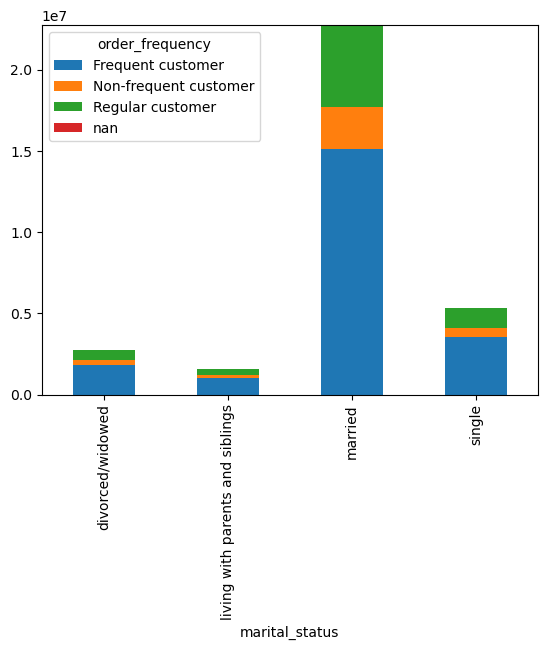

In [154]:
#Marital_freq Bar8 Chart
bar8 = marital_freq.plot(kind='bar', stacked =True)

In [155]:
# Exporting the bar8 chart in the path
bar8.figure.savefig(os.path.join(path, 'Visualizations', 'bar_marital_freq.png'))

In [157]:
# Export data "pkl"
cust_ord_prod.to_pickle(os.path.join(path,'instacart_final.pkl'))

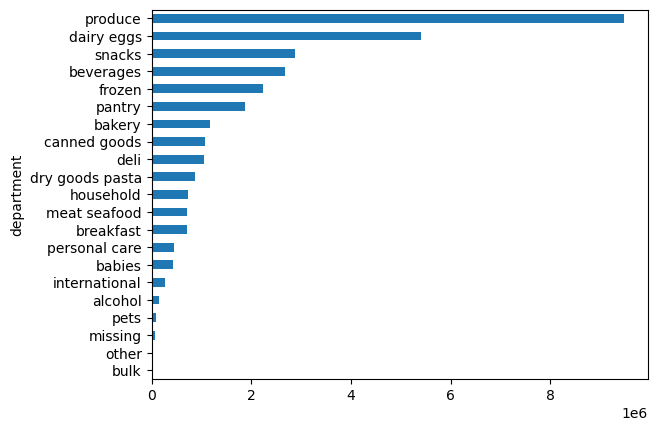

In [158]:
Bar =cust_ord_prod.department.value_counts().sort_values().plot(kind = 'barh')

In [159]:
# Exporting the Bar chart in the path
Bar.figure.savefig(os.path.join(path, 'Visualizations', 'Bar_department.png'))

In [161]:
dep_freq = pd.crosstab(cust_ord_prod['department'], cust_ord_prod['order_frequency'], dropna = False)

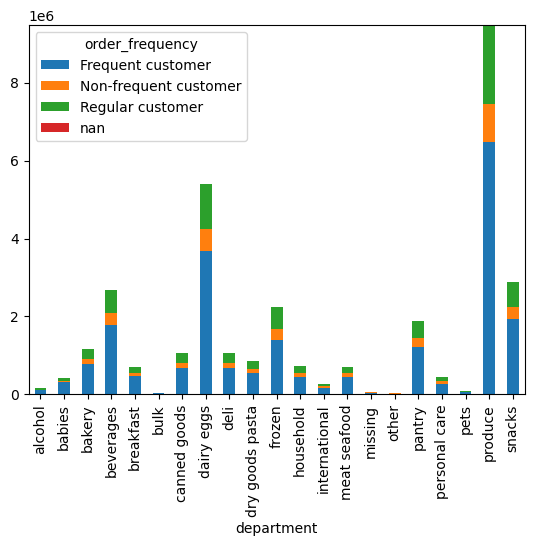

In [162]:
Bar1 = dep_freq.plot(kind='bar', stacked =True)

In [163]:
# Exporting the Bar1 chart in the path
Bar1.figure.savefig(os.path.join(path, 'Visualizations', 'Bar_frequency.png'))